In [1]:
from random import sample

# 常规导包
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, firwin2, fftconvolve,stft

In [2]:
def generate_target_psd_noise(filter_order,samples,psd,noise,freq_vec):
    b = firwin2(filter_order + 1,freq_vec/(samples/2) ,np.sqrt(psd))
    output_noise = np.sqrt(samples)* fftconvolve(b,noise)
    return output_noise
    

/tmp/ipykernel_34836/3032061423.py:14: RuntimeWarning: divide by zero encountered in power
  Theta = (eta * t / t_c)**(-1/4)
/tmp/ipykernel_34836/3032061423.py:14: RuntimeWarning: invalid value encountered in power
  Theta = (eta * t / t_c)**(-1/4)
/tmp/ipykernel_34836/3032061423.py:15: RuntimeWarning: invalid value encountered in power
  phi_t = -(3/128) * (G * M / c**3) * (t / t_c)**(5/8) * eta**(-3/8)


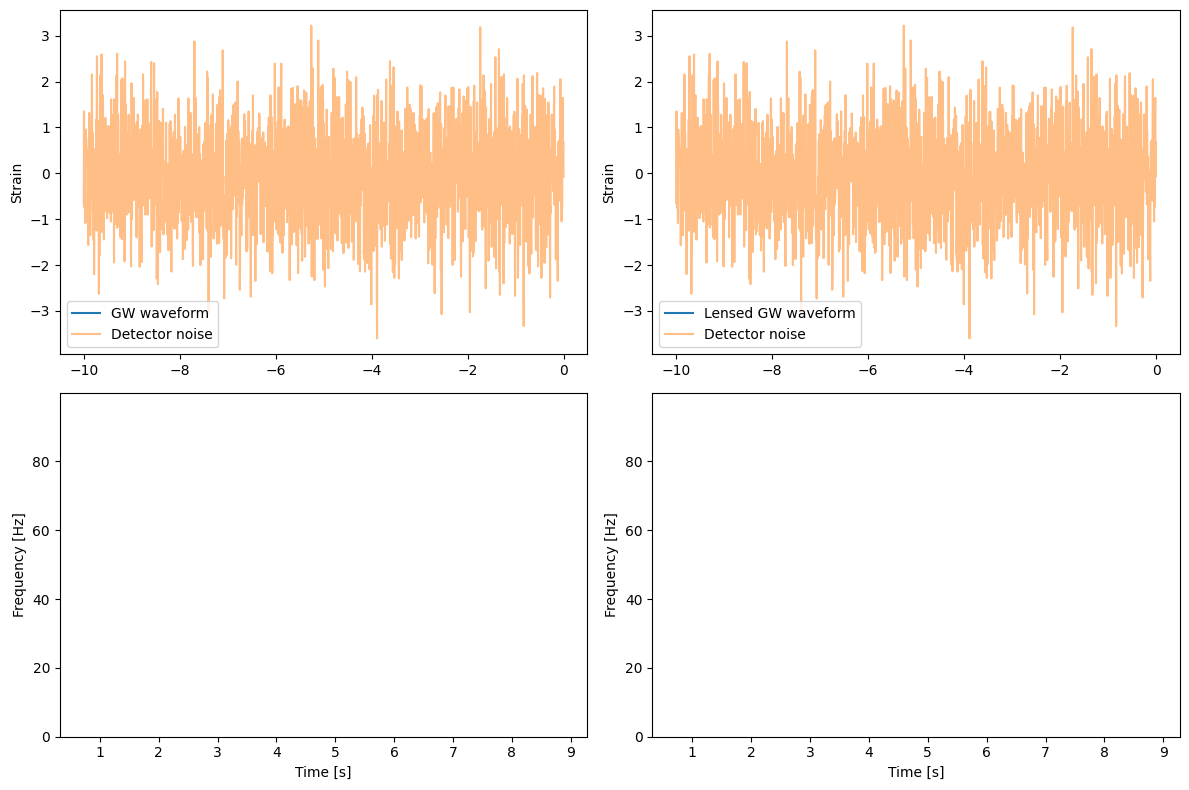

In [10]:
# 定义参数
m1 = m2 = 10 * 1.989 * 10**30  # 双星质量，单位 kg
M = m1 + m2  # 总质量，单位 kg
eta = m1 * m2 / M**2  # 对称质量比
D_S = 400 * 3.086 * 10**22  # 距离，单位 m (1 Mpc = 3.086 * 10^22 m)
c = 3 * 10**8  # 光速，单位 m/s
G = 6.674 * 10**(-11)  # 引力常数，单位 m^3 kg^(-1) s^(-2)

# 时间数组，避免 t = 0
t = np.linspace(-10, 0, 2000)  # 时间数组，单位 s

# 计算后牛顿参数和轨道相位
t_c = (5 * G * M * c**3) / (256 * np.pi**2 * eta * c**5)  # 特征时间
Theta = (eta * t / t_c)**(-1/4)
phi_t = -(3/128) * (G * M / c**3) * (t / t_c)**(5/8) * eta**(-3/8)

# 计算引力波波形
h_t = -8 * np.sqrt(np.pi / 5) * (eta * c**2 / (D_S * t_c)) * np.exp(-2j * phi_t) * Theta**(-1/4)

# 模拟透镜效应
lens放大因子 = 1.5  # 透镜放大因子，简化模型
h_lensed_t = h_t * lens放大因子

# 生成高斯噪声
noise = np.random.normal(0, 1, h_t.shape[0])

# 绘制引力波波形和噪声
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 后牛顿波形
axs[0, 0].plot(t, h_t.real, label='GW waveform')
axs[0, 0].plot(t, noise, label='Detector noise', alpha=0.5)
axs[0, 0].set_ylabel('Strain')
axs[0, 0].legend()

# 透镜效应后的波形
axs[0, 1].plot(t, h_lensed_t.real, label='Lensed GW waveform')
axs[0, 1].plot(t, noise, label='Detector noise', alpha=0.5)
axs[0, 1].set_ylabel('Strain')
axs[0, 1].legend()

# 后牛顿波形的频谱图
Z, freqs, times, im = axs[1, 0].specgram(h_t.real, Fs=1/(t[1]-t[0]))
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Frequency [Hz]')

# 透镜效应后波形的频谱图
Z_lensed, _, _, _ = axs[1, 1].specgram(h_lensed_t.real, Fs=1/(t[1]-t[0]))
axs[1, 1].set_xlabel('Time [s]')
axs[1, 1].set_ylabel('Frequency [Hz]')

plt.tight_layout()
plt.show()

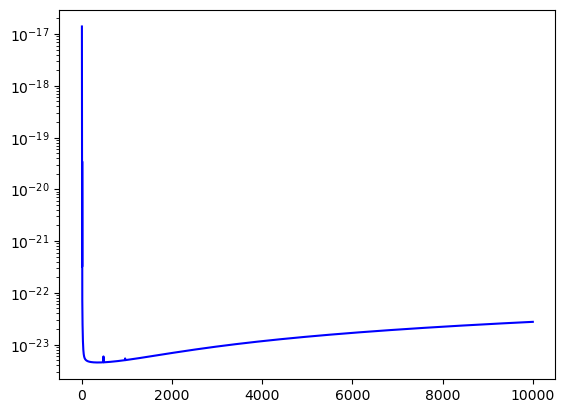

In [5]:
# 生成噪声

# 获取频率和噪声功率谱密度
freq_psd = np.loadtxt('aligo_design.txt')

posfreqs = freq_psd[:,0]
psd = freq_psd[:,1]

fig = plt.figure()
plt.plot(posfreqs, psd, 'b')
plt.yscale('log')

plt.show()


In [6]:
# 生成噪声
initial_noise = np.random.normal(0,1,nsamples)
filter_order = 200
output_noise = generate_target_psd_noise(filter_order,samples,psd,initial_noise,posfreqs)



f,pxx = welch(output_noise,fs = samples)

fig = plt.figure(figsize = (12,8))
plt.subplot(3,1,1)
plt.plot(f,pxx,'b')
plt.yscale('log')
plt.xlim(0,500)

plt.subplot(3,1,2)
plt.plot(timeVec,output_noise[:len(timeVec)],'b')


plt.subplot(3,1,3)
plt.plot(timeVec,initial_noise,'b')
plt.show()



ValueError: freq must start with 0 and end with fs/2.